Exercícios para Análise de Dados (Nível Iniciante)
Aqui estão 10 perguntas de negócio para você responder utilizando a base de dados fornecida. O objetivo é que você utilize Python e a biblioteca Pandas para explorar, analisar e extrair insights dos dados.

1. Análise Exploratória Inicial

Pergunta: Qual é a estrutura geral da nossa base de dados?

Tarefa: Carregue o arquivo CSV em um DataFrame do Pandas. Exiba as 5 primeiras e as 5 últimas linhas. Em seguida, gere um resumo que mostre a contagem de registros, a média, o desvio padrão, e os valores mínimo e máximo para as colunas numéricas. Por fim, verifique se existem valores nulos no conjunto de dados.

In [1]:
#Fazendo os imports
import pandas as pd
import numpy as np

In [2]:
#Carregando o arquivo
df_ex = pd.read_csv('database_vendas_online.csv')

In [3]:
#Exibindo as 5 primeiras linhas
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29


In [4]:
#Exibindo as 5 últimas linhas
df_ex.tail()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total
14995,15995,264,2025-05-28,Liquidificador,Casa e Cozinha,76.17,2,152.34
14996,15996,251,2024-08-06,Fantasia,Livros,42.08,1,42.08
14997,15997,1478,2025-06-03,Barraca de Camping,Esportes e Lazer,229.62,1,229.62
14998,15998,312,2024-03-27,Panela de Pressão,Casa e Cozinha,158.29,1,158.29
14999,15999,219,2024-02-27,Carregador Portátil,Eletrônicos,90.52,1,90.52


In [5]:
#Resumo da tabela
df_ex.describe()

,ID_Pedido,ID_Cliente,Preco_Unitario,Quantidade,Valor_Total
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8499.500000,799.094000,319.770143,1.738800,559.040797
std,4330.271354,403.448156,535.402369,1.131132,1181.763037
min,1000.000000,100.000000,18.000000,1.000000,18.010000
25%,4749.750000,447.000000,51.355000,1.000000,81.537500
50%,8499.500000,799.000000,113.440000,1.000000,165.815000
75%,12249.250000,1145.250000,269.085000,2.000000,498.030000
max,15999.000000,1500.000000,2748.530000,5.000000,13742.650000


In [6]:
#Verificando se há valores nulos em alguma coluna
df_ex.isnull().sum()

ID_Pedido         0
ID_Cliente        0
Data_Pedido       0
Produto           0
Categoria         0
Preco_Unitario    0
Quantidade        0
Valor_Total       0
dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Receita Total

Pergunta: Qual foi a receita total da loja no período coberto por esta base de dados?

In [7]:
#Calculando a soma de todos os valores da coluna Valor_Total
vendastotais =df_ex['Valor_Total'].sum()
vendastotais

8385611.959999999

In [8]:
#Abreviando o valor total para melhor visualização
vendastotais.round(2)

8385611.96

--------------------------------------------------------------------------------------------------------------------------------------------------------

3. Produtos Mais Vendidos

Pergunta: Quais são os 10 produtos mais vendidos em termos de quantidade?

In [9]:
#Respondendo ao exercício e visualizando em ordem decrescente
prodmaisvend = df_ex.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)
prodmaisvend

Produto
Cafeteira          1102
Notebook           1092
Fantasia           1088
Smartwatch         1086
Bola de Futebol    1084
Tablet             1082
Óculos de Sol      1082
Tênis              1077
Camiseta           1067
Corda de Pular     1060
Name: Quantidade, dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------

4. Categorias de Maior Faturamento

Pergunta: Quais categorias de produtos geram a maior parte da receita?

In [10]:
#Realizando o group by de categoria pela soma do valor total e já visualizando o resultado em ordem decrescente
catmaiorfat = df_ex.groupby('Categoria')['Valor_Total'].sum()
catmaiorfat.sort_values(ascending=False)

Categoria
Eletrônicos          5650573.15
Esportes e Lazer     1081963.93
Casa e Cozinha        776612.96
Moda e Acessórios     670804.43
Livros                205657.49
Name: Valor_Total, dtype: float64

In [11]:
#Verificando quantas categorias existem para ter certeza de que só existem 5 categorias
df_ex['Categoria'].nunique()

5

--------------------------------------------------------------------------------------------------------------------------------------------------------

5. Análise de Vendas ao Longo do Tempo

Pergunta: Como as vendas totais se comportaram mês a mês?

In [12]:
#Extraindo os meses e anos e criando novas colunas para ambos
df_ex['Data_Pedido'] = pd.to_datetime(df_ex['Data_Pedido'])
df_ex['Ano'] = df_ex['Data_Pedido'].dt.year
df_ex['Mês'] = df_ex['Data_Pedido'].dt.month

In [13]:
#Visualizando a "nova" database
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04,2024,7
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34,2023,8
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10,2024,9
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16,2024,11
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29,2024,2


In [14]:
#Visualizando as vendas por ano (não foi o pedido no exercício, mas já estou fazendo)
vendasano = df_ex.groupby('Ano')['Valor_Total'].sum()
vendasano

Ano
2023    1767089.19
2024    4158994.38
2025    2459528.39
Name: Valor_Total, dtype: float64

In [15]:
#Visualizando as vendas por mês
vendasmes = df_ex.groupby('Mês')['Valor_Total'].sum()
vendasmes

Mês
1     723563.12
2     677936.03
3     702698.30
4     683691.87
5     749227.79
6     692899.71
7     671609.66
8     648189.00
9     698874.53
10    700505.51
11    656363.02
12    780053.42
Name: Valor_Total, dtype: float64

In [16]:
#Análise das vendas mês a mês com ano separado, sugestão da IA 
vendaslongotempo = df_ex.groupby(['Ano', 'Mês'])['Valor_Total'].sum()
print(vendaslongotempo)

Ano   Mês
2023  8      315546.38
      9      358664.32
      10     348192.28
      11     328777.83
      12     415908.38
2024  1      344214.96
      2      311892.14
      3      367433.27
      4      320044.92
      5      380745.76
      6      356305.27
      7      361461.77
      8      332642.62
      9      340210.21
      10     352313.23
      11     327585.19
      12     364145.04
2025  1      379348.16
      2      366043.89
      3      335265.03
      4      363646.95
      5      368482.03
      6      336594.44
      7      310147.89
Name: Valor_Total, dtype: float64


--------------------------------------------------------------------------------------------------------------------------------------------------------

6. Identificação dos Clientes Mais Valiosos

Pergunta: Quem são os 5 clientes que mais gastaram na loja?

In [17]:
#Relembrando as colunas e seus dados
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04,2024,7
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34,2023,8
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10,2024,9
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16,2024,11
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29,2024,2


In [18]:
#Fazendo o agrupamento de clientes que mais compraram ordenando pelos 5 primeiros
clientesmaisval = df_ex.groupby('ID_Cliente')['Valor_Total'].sum()
clientesmaisval.sort_values(ascending=False).head()

ID_Cliente
536     31108.09
664     26195.65
173     25563.13
902     25319.28
1051    24761.37
Name: Valor_Total, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------

7. Análise do Ticket Médio por Pedido

Pergunta: Qual é o valor médio gasto por pedido?

In [19]:
#Calculando o valor médio por pedido simplificado
mediavalortot = df_ex['Valor_Total'].mean()
mediavalortot

559.0407973333332

In [61]:
#Calculando o valor médio mais "avançado"
valormediogast = df_ex.groupby('ID_Pedido')['Valor_Total'].sum().mean().round(2)
valormediogast

559.04

--------------------------------------------------------------------------------------------------------------------------------------------------------

8. Distribuição de Preços dos Produtos

Pergunta: Qual é o produto mais caro e o mais barato em nosso catálogo?

In [21]:
#Identificando o preço mais alto
df_ex['Preco_Unitario'].max()

2748.53

In [22]:
#Identificando o preço mais baixo
df_ex['Preco_Unitario'].min()

18.0

In [23]:
#Localizando o produto mais caro
df=pd.DataFrame(df_ex)
produtocaro = df_ex['Preco_Unitario'] == 2748.53
produtobusc1 = df.loc[produtocaro]
produtobusc1

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês
4273,5273,1175,2023-08-30,Notebook,Eletrônicos,2748.53,5,13742.65,2023,8


In [24]:
#Localizando o produto mais barato
df=pd.DataFrame(df_ex)
produtobarato = df_ex['Preco_Unitario'] == 18.0
produtobusc2 = df.loc[produtobarato]
produtobusc2

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês
1312,2312,668,2025-01-06,Corda de Pular,Esportes e Lazer,18.0,3,54.0,2025,1


--------------------------------------------------------------------------------------------------------------------------------------------------------

9. Pedidos com Alta Quantidade

Pergunta: Existem pedidos com uma quantidade de itens muito acima da média? Quais são?

In [25]:
#Descobrindo primeiramente a média da quantidade por pedido
df_ex['Quantidade'].mean()

1.7388

In [26]:
#Verificando agora a quantidade máxima
df_ex['Quantidade'].max()

5

In [27]:
#Seu índice
maiorquantia = df_ex['Quantidade'].idxmax()
maiorquantia

8

In [28]:
#Como a média da quantidade é um pouco menor do que 2, mostrando pedidos com quantidade igual a 5
grandequantidade = df_ex[df_ex['Quantidade'] >= 5]
print(grandequantidade)

       ID_Pedido  ID_Cliente Data_Pedido                Produto  \
8           1008         250  2025-05-30        Bola de Futebol   
14          1014        1487  2023-08-07             Smartphone   
45          1045         726  2024-06-22         Liquidificador   
48          1048        1381  2025-03-16         Fone de Ouvido   
86          1086        1397  2024-10-30  Bicicleta Ergométrica   
...          ...         ...         ...                    ...   
14927      15927        1401  2025-02-19        Aspirador de Pó   
14942      15942         389  2024-09-07  Bicicleta Ergométrica   
14960      15960        1353  2025-05-13      Panela de Pressão   
14963      15963        1038  2024-09-19    Carregador Portátil   
14964      15964         546  2025-02-05         Fone de Ouvido   

              Categoria  Preco_Unitario  Quantidade  Valor_Total   Ano  Mês  
8      Esportes e Lazer           55.29           5       276.45  2025    5  
14          Eletrônicos         1197.65

--------------------------------------------------------------------------------------------------------------------------------------------------------

10. Análise de Vendas por Categoria Específica

Pergunta: Qual foi o faturamento total e a quantidade vendida especificamente para a categoria "Eletrônicos"?

In [29]:
#Mostrando o faturamento total, sem distinção de categoria
fattotal = df_ex.groupby('Categoria')['Valor_Total'].sum()
fattotal

Categoria
Casa e Cozinha        776612.96
Eletrônicos          5650573.15
Esportes e Lazer     1081963.93
Livros                205657.49
Moda e Acessórios     670804.43
Name: Valor_Total, dtype: float64

In [30]:
#Criando um Dataframe para filtrar produtos apenas pela categoria Eletrônicos
df = pd.DataFrame(df_ex).query(" Categoria == 'Eletrônicos' ")

In [31]:
#Faturamento apenas da categoria Eletrônicos
df_fatelet = df.groupby('Categoria')['Valor_Total'].sum()
df_fatelet

Categoria
Eletrônicos    5650573.15
Name: Valor_Total, dtype: float64

In [32]:
#Quantidade vendida da categoria Eletrônicos
df_quantelet = df.groupby('Categoria')['Quantidade'].sum()
df_quantelet

Categoria
Eletrônicos    6334
Name: Quantidade, dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------

Parte 2 - Perguntas de negócio com gráficos

Exercício de Visualização de Dados (Parte 2)

1. Gráfico dos Produtos Mais Populares (Baseado no Exercício 3)
Análise Original: Você identificou os 10 produtos mais vendidos em termos de quantidade.

Nova Pergunta de Negócio: A equipe de marketing está criando um material para destacar nossos "produtos campeões" e precisa de um visual claro para um relatório. Como podemos apresentar os 10 produtos mais vendidos de uma forma que seja fácil de ler e comparar?

Sua Tarefa: Crie um gráfico de barras que mostre os 10 produtos mais vendidos (em quantidade).

In [33]:
#Visualizando novamente os 10 produtos mais vendidos
prodmaisvend = df_ex.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)
prodmaisvend

Produto
Cafeteira          1102
Notebook           1092
Fantasia           1088
Smartwatch         1086
Bola de Futebol    1084
Tablet             1082
Óculos de Sol      1082
Tênis              1077
Camiseta           1067
Corda de Pular     1060
Name: Quantidade, dtype: int64

In [34]:
#Fazendo os imports necessários para responder às perguntas de negócio
import matplotlib.pyplot as plt
import seaborn as sb

In [35]:
#Criando um dataframe à partir dos dados contidos na variável prodmaisvend
prods = ['Cafeteira', 'Notebook', 'Fantasia', 'Smartwatch', 'Bola de Futebol', 'Tablet', 'Óculos de Sol', 'Tênis', 'Camiseta', 'Corda de Pular']
quant = ['1102', '1092', '1088', '1086', '1084', '1082', '1082', '1077', '1067', '1060']
dados = {'prods': prods, 'quant': quant}

df = pd.DataFrame(dados)
df['quant'] = pd.to_numeric(df['quant']) 
df = df.sort_values(by='quant', ascending=False)

print(df)

             prods  quant
0        Cafeteira   1102
1         Notebook   1092
2         Fantasia   1088
3       Smartwatch   1086
4  Bola de Futebol   1084
5           Tablet   1082
6    Óculos de Sol   1082
7            Tênis   1077
8         Camiseta   1067
9   Corda de Pular   1060


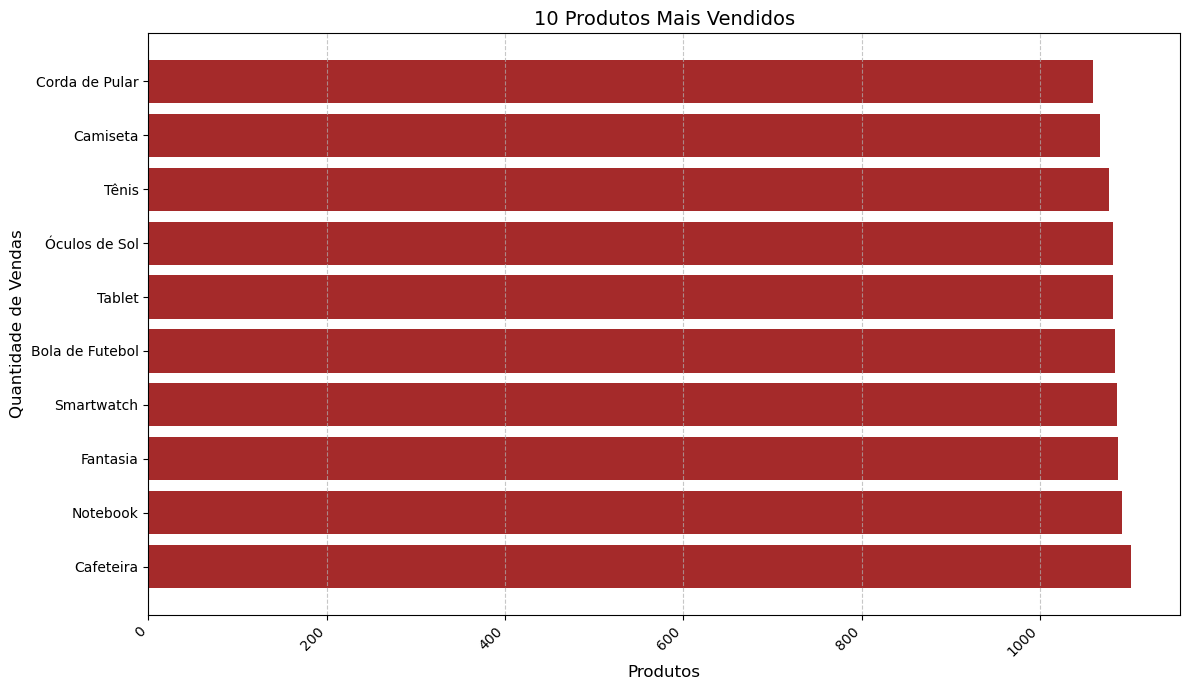

In [36]:
#Criando um gráfico de barras na horizontal para demonstrar os dados
plt.figure(figsize=(12, 7)) 
barras = plt.barh(df['prods'], df['quant'], color='brown')
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.title('10 Produtos Mais Vendidos', fontsize=14) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

Como o gráfico resultante deste exercício me pareceu tanto "inútil" como feio, pedi à IA para que me gerasse perguntas diferentes, dessa vez focando na possibilidade de eu realizar gráficos realmente úteis a partir das perguntas.

1. Análise de Vendas por Dia da Semana
Pergunta de Negócio: A equipe de marketing quer otimizar os gastos com anúncios e promoções. Para isso, eles precisam saber: "Existem dias da semana em que vendemos significativamente mais ou menos? Nossas vendas se concentram no fim de semana?"

In [37]:
#Visualização dos dados para facilitar o raciocínio
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04,2024,7
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34,2023,8
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10,2024,9
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16,2024,11
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29,2024,2


Pseudocódigo para resolução do problema:

- Extrair dia da semana da coluna Data_Pedido (criando uma nova coluna)
- Somar os valores totais de venda para cada dia da semana
- Criar um gráfico para demosntração dos resultados

In [38]:
#Extração do dia da semana a partir da coluna Data_Pedido e tradução direta dos dados de inglês para PT-BR
df_ex['Data_Pedido'] = pd.to_datetime(df_ex['Data_Pedido'])
df_ex['Dia_Semana'] = df_ex['Data_Pedido'].dt.day_name(locale='pt_BR')

In [39]:
#Visualização da nova coluna criada
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês,Dia_Semana
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04,2024,7,Quinta-feira
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34,2023,8,Segunda-feira
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10,2024,9,Segunda-feira
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16,2024,11,Sexta-feira
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29,2024,2,Segunda-feira


In [40]:
#Calculando a soma do total de vendas para cada dia da semana e ordenando
vendaspordia = df_ex.groupby('Dia_Semana')['Valor_Total'].sum().sort_values(ascending=False)
vendaspordia

Dia_Semana
Terça-feira      1235012.75
Sexta-feira      1230547.59
Sábado           1223197.09
Quinta-feira     1201313.28
Segunda-feira    1184533.65
Quarta-feira     1182075.55
Domingo          1128932.05
Name: Valor_Total, dtype: float64

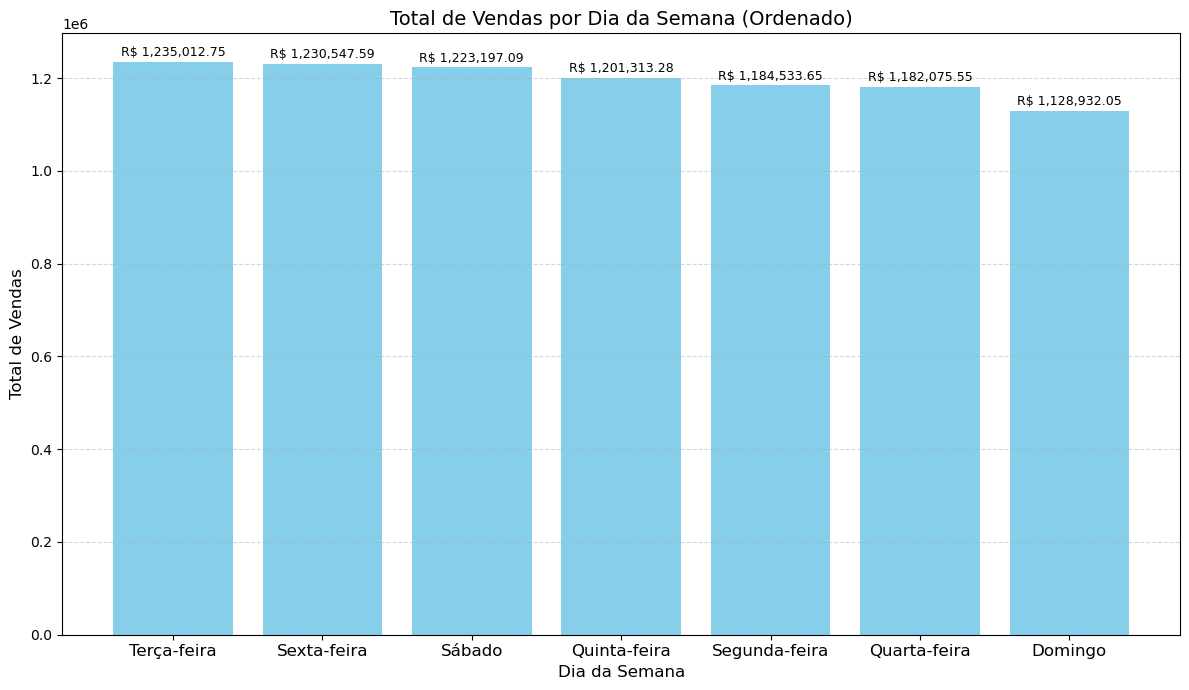

In [41]:
#Criando o gráfico com o total de vendas por dia da semana
plt.figure(figsize=(12, 7))
grafico = plt.bar(vendaspordia.index, vendaspordia.values, color='skyblue')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.title('Total de Vendas por Dia da Semana (Ordenado)', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize = 12) 
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar in grafico:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + (max(vendaspordia.values) * 0.005), 
        f'R$ {yval:,.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='black' 
    )

plt.show()

Conclusões: Em resumo, os dias em que vendemos mais são: Terça-feira, sexta-feira e sábado, sendo domingo o dia em que vendemos menos e, portanto, não havendo um volume necessariamente maior de vendas nos finais de semana em comparação com os dias de semana.

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Distribuição de Receita por Faixa de Preço

Pergunta de Negócio: O time de estratégia de produtos quer entender de onde vem a maior parte da nossa receita. "Será que ganhamos mais dinheiro vendendo muitos itens baratos ou vendendo poucos itens caros? Em qual faixa de preço deveríamos concentrar nosso marketing?"

In [42]:
#Primeiro, entendendo qual é a faixa de preço do produto mais caro e depois do mais barato
df_ex['Preco_Unitario'].max()

2748.53

In [43]:
df_ex['Preco_Unitario'].min()

18.0

In [44]:
#Depois, criando faixas de preço baseadas nos valores mínimo e máximo. Aproximando, o preço máximo se encontra na faixa de R$2800, enquanto o mínimo
#custa apenas R$18,00. Dividindo o valor máximo (R$2800) em 8 partes (para assim podermos criar um gráfico com uma distribuição interessante), o intervalo 
#na faixa de preços será de R$350,00.

df_ex['Valor_Total'] = pd.to_numeric(df_ex['Valor_Total'], errors='coerce')
df_ex.dropna(subset=['Valor_Total'], inplace=True)

bins = [0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800]
labels = ['R$0 - 350', 'R$351 - 700', 'R$701 - 1050', 'R$1051 - 1400', 'R$1401 - 1750', 'R$1751 - 2100', 'R$2101 - 2450', 'R$2451 - 2800']
df_ex['Faixa_Preco'] = pd.cut(x=df_ex['Preco_Unitario'], bins=bins, labels=labels, right=True)

print("DataFrame com a nova coluna 'Faixa_Preco':")
print(df_ex)

DataFrame com a nova coluna 'Faixa_Preco':
       ID_Pedido  ID_Cliente Data_Pedido                Produto  \
0           1000         905  2024-07-18        Aspirador de Pó   
1           1001         398  2023-08-28              Biografia   
2           1002         897  2024-09-02  Bicicleta Ergométrica   
3           1003         822  2024-11-01              Cafeteira   
4           1004        1116  2024-02-26        Bola de Futebol   
...          ...         ...         ...                    ...   
14995      15995         264  2025-05-28         Liquidificador   
14996      15996         251  2024-08-06               Fantasia   
14997      15997        1478  2025-06-03     Barraca de Camping   
14998      15998         312  2024-03-27      Panela de Pressão   
14999      15999         219  2024-02-27    Carregador Portátil   

              Categoria  Preco_Unitario  Quantidade  Valor_Total   Ano  Mês  \
0        Casa e Cozinha          273.04           1       273.04  2024   

In [45]:
#Fazendo as somas das vendas totais por faixas de preço estabelecidas
totalporfaixa = df_ex.groupby('Faixa_Preco', observed=False)['Valor_Total'].sum().sort_index()
totalporfaixa

Faixa_Preco
R$0 - 350        2230314.42
R$351 - 700       862934.75
R$701 - 1050     1295033.68
R$1051 - 1400    1268265.13
R$1401 - 1750          0.00
R$1751 - 2100          0.00
R$2101 - 2450    1091322.66
R$2451 - 2800    1637741.32
Name: Valor_Total, dtype: float64

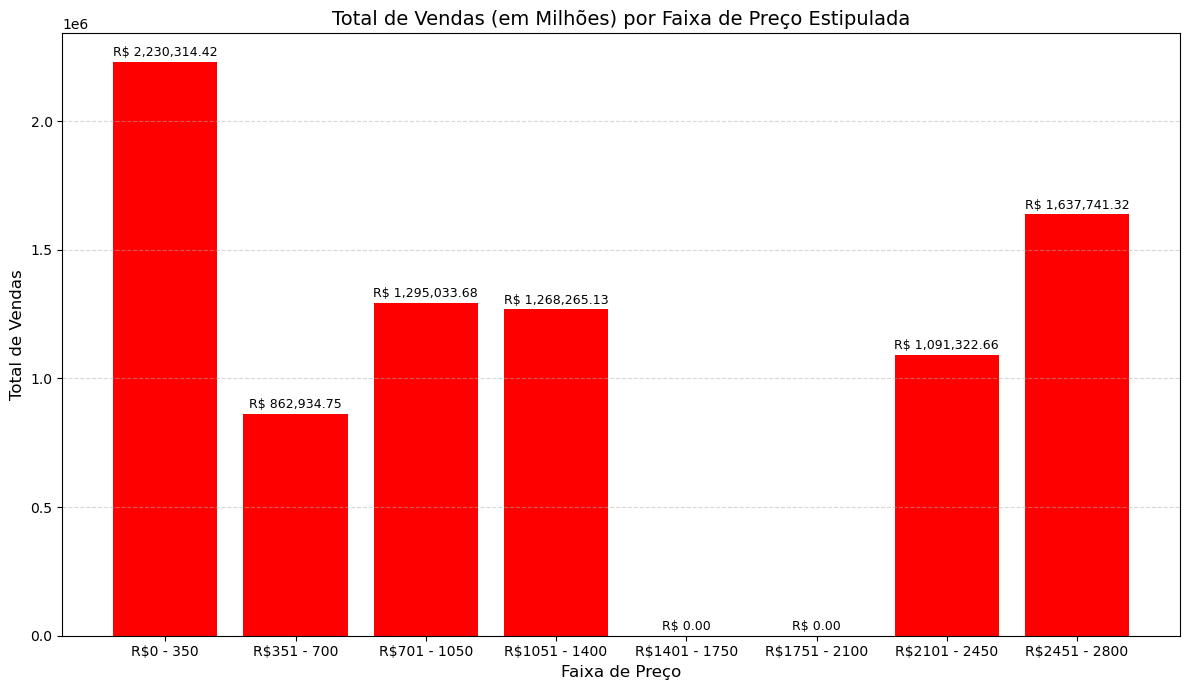

In [46]:
#Criando o gráfico as vendas totais por faixa de preço
plt.figure(figsize=(12, 7))
grafico = plt.bar(totalporfaixa.index, totalporfaixa.values, color='red')
plt.xlabel('Faixa de Preço', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.title('Total de Vendas (em Milhões) por Faixa de Preço Estipulada', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize = 10) 
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar in grafico:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + (max(totalporfaixa.values) * 0.005), 
        f'R$ {yval:,.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='black' 
    )

plt.show()

Possíveis conclusões: O maior lucro vem dos produtos mais baratos (entre 0 a 350 reais), seguidos da faixa de preço mais cara (2450 a 2800 reais) e da terceira e quarta faixa de preço mais baratas (de 701 a 1050 e 1051 a 1400 reais). Não existem produtos no catálogo na faixa de preços entre 1401 a 2100, faixa intermediária. Excluindo-se tais faixas, as faixas de preço que menos vendem são a segunda mais barata, de 351 a 700 e a segunda mais cara, entre 2101 e 2450 reais.

--------------------------------------------------------------------------------------------------------------------------------------------------------

3. Relação Entre Preço e Quantidade 
Pergunta de Negócio: Existe uma teoria na empresa de que clientes só compram múltiplas unidades de produtos quando eles são baratos. "Podemos confirmar visualmente se existe uma relação entre o preço unitário de um item e a quantidade que os clientes compram por pedido?"

In [47]:
#Visualizando os dados novamente
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês,Dia_Semana,Faixa_Preco
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04,2024,7,Quinta-feira,R$0 - 350
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34,2023,8,Segunda-feira,R$0 - 350
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10,2024,9,Segunda-feira,R$351 - 700
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16,2024,11,Sexta-feira,R$0 - 350
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29,2024,2,Segunda-feira,R$0 - 350


In [48]:
#Fazendo um groupby entre as colunas Preço Unitário e Quantidade e transformando a variável em dataframe para poder manipulá-la no gráfico
vendaporquant = df_ex.groupby('Preco_Unitario')['Quantidade'].sum().sort_values(ascending=False)
vendaporquantdf = vendaporquant.reset_index()
vendaporquantdf

,Preco_Unitario,Quantidade
0,45.74,14
1,19.97,14
2,21.96,14
3,48.13,13
4,53.59,13
...,...,...
11396,56.75,1
11397,181.53,1
11398,181.49,1
11399,181.48,1


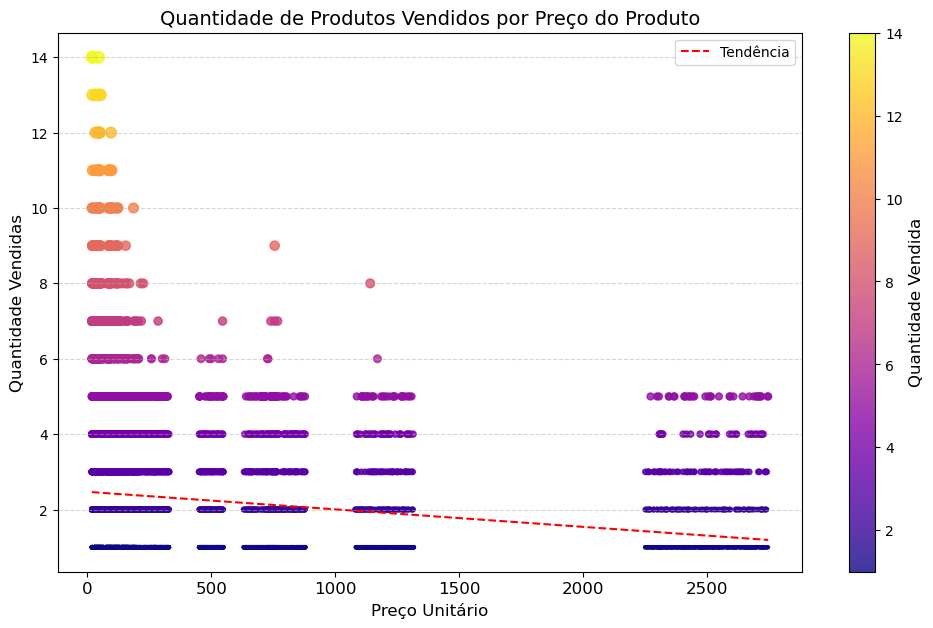

In [49]:
#Criando o gráfico Scatter Plot para responder à pergunta de negócio e também uma linha de tendência para facilitar o entendimento

plt.figure(figsize=(12, 7))
grafico = plt.scatter(
    vendaporquantdf['Preco_Unitario'],
    vendaporquantdf['Quantidade'],
    c=vendaporquantdf['Quantidade'], 
    s=vendaporquantdf['Quantidade'] * 5,  
    cmap='plasma',  
    alpha=0.8,
)
a, b = np.polyfit(vendaporquant.index, vendaporquant.values, 1)
x_linha = np.array([vendaporquant.index.min(), vendaporquant.index.max()])
y_linha = a * x_linha + b
plt.plot(x_linha, y_linha, color='red', linestyle='--', label=f'Tendência')
plt.xlabel('Preço Unitário', fontsize=12)
plt.ylabel('Quantidade Vendidas', fontsize=12)
plt.title('Quantidade de Produtos Vendidos por Preço do Produto', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize = 12) 
plt.grid(axis='y', linestyle='--', alpha=0.5)
cbar = plt.colorbar(grafico)
cbar.set_label('Quantidade Vendida', fontsize=12)
plt.legend()

plt.show()

Podemos concluir com a ajuda da linha de tendência que sim, quanto maior o preço dos produtos, em geral menor quantidade eles vendem. Não obstante, os produtos com maiores quantidades vendidas (de 8 para cima) possuem quase todos preço inferior a 500 reais, o que reforça o insight obtido pela linha de tendência. Há um "vão" no gráfico pela inexistência de produtos com preço na faixa dos 1400 a 2100 reais, como demonstrado no gráfico anterior.

Quando perguntei para a IA se a minha solução estaria correta, ela disse que:

"No entanto, temos que discutir um ponto conceitual muito importante na preparação dos dados, que muda completamente o significado da sua análise. Sua conclusão está correta para o gráfico que você gerou, mas o gráfico não responde à pergunta de negócio original.

Vamos analisar isso em detalhes.

A Pergunta de Negócio Original vs. a Análise Realizada
A Pergunta Original: "Será que existe uma relação entre o preço de um produto e a quantidade que os clientes compram em uma única transação?"

O objetivo era ver, para cada venda individual, se itens mais baratos levavam a uma Quantidade maior naquele pedido específico. A análise deveria ter um ponto para cada linha do DataFrame original.

O que sua Análise Fez: Ao usar df_ex.groupby('Preco_Unitario')['Quantidade'].sum(), você não analisou as transações individuais. Em vez disso, você respondeu a uma pergunta diferente: "Qual é o volume total de unidades vendidas para cada preço de produto existente no catálogo?" "

E gerou o gráfico abaixo, que acredito ser muito menos informativo e útil do que o gráfico que eu gerei (ainda que não respondendo diretamente a pergunta de negócio feita).

Ainda assim, é possível perceber a tendência de que, quanto maior for o preço do produto, em geral menor será a quantidade comprada por pedido.

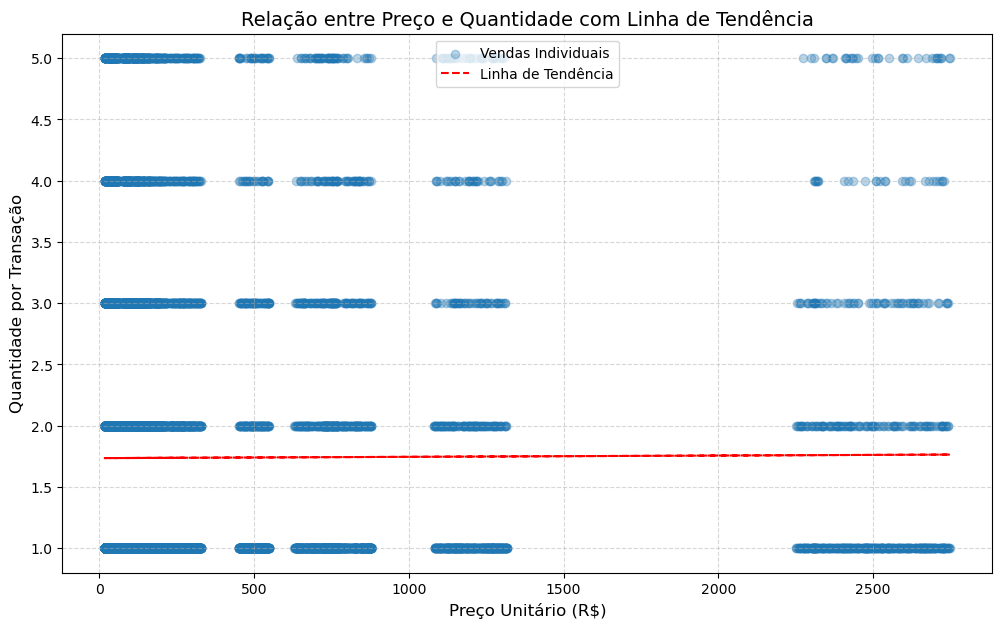

In [50]:
x_data = df_ex['Preco_Unitario']
y_data = df_ex['Quantidade']

a, b = np.polyfit(x_data, y_data, 1)
y_tendencia = a * x_data + b

plt.figure(figsize=(12, 7))
plt.scatter(x_data, y_data, alpha=0.3, label='Vendas Individuais') 
plt.plot(x_data, y_tendencia, color='red', linestyle='--', label='Linha de Tendência')

plt.title('Relação entre Preço e Quantidade com Linha de Tendência', fontsize=14)
plt.xlabel('Preço Unitário (R$)', fontsize=12)
plt.ylabel('Quantidade por Transação', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

4. Comparativo de Faturamento: Eletrônicos vs. Todas as Outras Categorias

Pergunta de Negócio: A diretoria sabe que a categoria "Eletrônicos" é importante, mas eles querem um único slide que mostre o quão dominante ela é. "Qual é o impacto da categoria 'Eletrônicos' no faturamento total, quando comparada com a soma de todas as outras categorias juntas?"

Primeiramente, como esta é uma pergunta de negócio que envolve vários passos, fazendo um pseudocódigo para facilitar a resolução:
- Calcular o faturamento total da categoria Eletrônicos;
- Calcular o faturamento de todas as outras categorias somadas;
- Unir o faturamento da categoria Eletrônicos e a fatura da soma de todas as categorias menos Eletrônicos em um único gráfico.

In [51]:
#Calculando o faturamento da categoria Eletrônicos, e apenas Eletrônicos
eletronicosfat = df_ex.groupby('Categoria').get_group('Eletrônicos')['Valor_Total'].sum()
eletronicosfat

5650573.15

In [52]:
#Calculando a soma do faturamento de todas as outras categorias
outrascatfat = df_ex[df_ex['Categoria'] != 'Eletrônicos']['Valor_Total'].sum()
outrascatfat

2735038.81

In [53]:
#Calculando o faturamento total de todas as categorias, para já se ter uma noção imediata do quanto a categoria Eletrônicos é relevante em comparação
#com o faturamento total
todascatfat = df_ex['Valor_Total'].sum()
todascatfat.round(2)

8385611.96

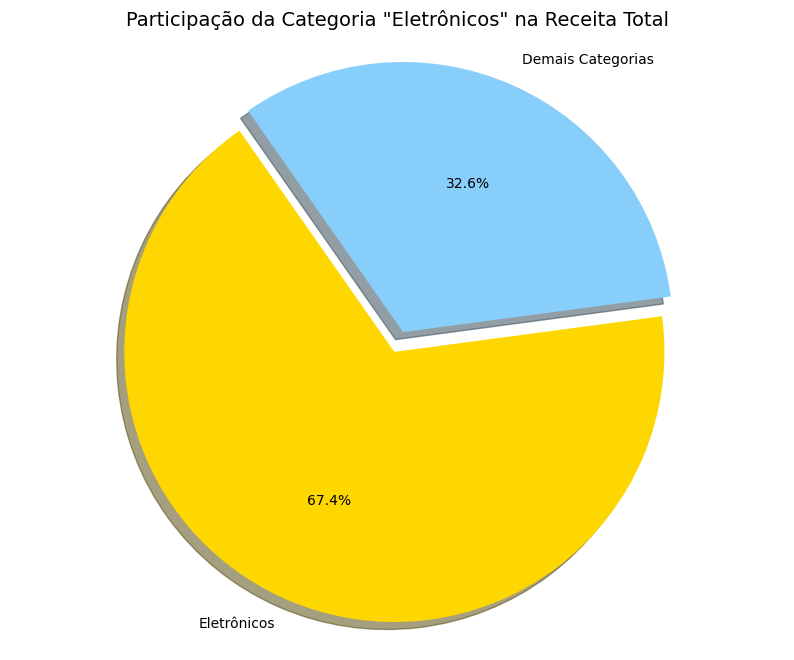

In [54]:
#Criando um gráfico de pizza para visualização das informações
valores = [eletronicosfat, outrascatfat]
rotulos = ['Eletrônicos', 'Demais Categorias']
explode = (0.08, 0) 
cores = ['gold', 'lightskyblue']

plt.figure(figsize=(10, 8)) 
plt.pie(
    valores, 
    explode=explode, 
    labels=rotulos, 
    colors=cores,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=125      
)

plt.title('Participação da Categoria "Eletrônicos" na Receita Total', fontsize=14)

plt.axis('equal')  

plt.show()

Conclusões: Podemos perceber, antes mesmo da criação do gráfico, quando comparamos o faturamento apenas da categoria Eletrônicos com as demais categorias e com todas as categorias somadas, que o departamento de Eletrônicos é o maior gerador de receita da empresa. Com o gráfico, fica ainda mais evidente e de fácil visualização o quanto a categoria é importante, sendo esta, sozinha, responsável por cerca de 2/3 de todo o faturamento da empresa.

--------------------------------------------------------------------------------------------------------------------------------------------------------

5. Análise de Concentração de Clientes (TOP 5 vs. Restante)
Pergunta de Negócio: O time de CRM quer justificar um programa de fidelidade VIP. Eles precisam provar que um pequeno grupo de clientes tem um valor desproporcional para a empresa. "Qual a diferença de faturamento entre o grupo dos nossos 5 melhores clientes e a média de faturamento dos demais clientes?"

In [55]:
#Visualizando os dados
df_ex.head()

,ID_Pedido,ID_Cliente,Data_Pedido,Produto,Categoria,Preco_Unitario,Quantidade,Valor_Total,Ano,Mês,Dia_Semana,Faixa_Preco
0,1000,905,2024-07-18,Aspirador de Pó,Casa e Cozinha,273.04,1,273.04,2024,7,Quinta-feira,R$0 - 350
1,1001,398,2023-08-28,Biografia,Livros,54.34,1,54.34,2023,8,Segunda-feira,R$0 - 350
2,1002,897,2024-09-02,Bicicleta Ergométrica,Esportes e Lazer,658.70,3,1976.10,2024,9,Segunda-feira,R$351 - 700
3,1003,822,2024-11-01,Cafeteira,Casa e Cozinha,130.29,4,521.16,2024,11,Sexta-feira,R$0 - 350
4,1004,1116,2024-02-26,Bola de Futebol,Esportes e Lazer,56.29,1,56.29,2024,2,Segunda-feira,R$0 - 350


In [56]:
#Descobrindo quem são os clientes VIP (os 5 que mais gastam)
clientesvip = df_ex.groupby('ID_Cliente')['Valor_Total'].sum().sort_values(ascending = False).head()
clientesvip

ID_Cliente
536     31108.09
664     26195.65
173     25563.13
902     25319.28
1051    24761.37
Name: Valor_Total, dtype: float64

In [57]:
#Descobrindo a média gasta por este pequeno grupo, para assim poder comparar com a média dos clientes comuns
clientesvipdf = clientesvip.mean().round(2)
clientesvipdf

26589.5

In [58]:
#Descobrindo a média de gastos de todos os clientes, excluindo os 5 clientes que mais gastam
idsvip = clientesvip.index
clientescomuns = df_ex[~df_ex['ID_Cliente'].isin(idsvip)]
clientescomunsdf = clientescomuns.groupby('ID_Cliente')['Valor_Total'].sum().mean().round(2)
clientescomunsdf

5911.65

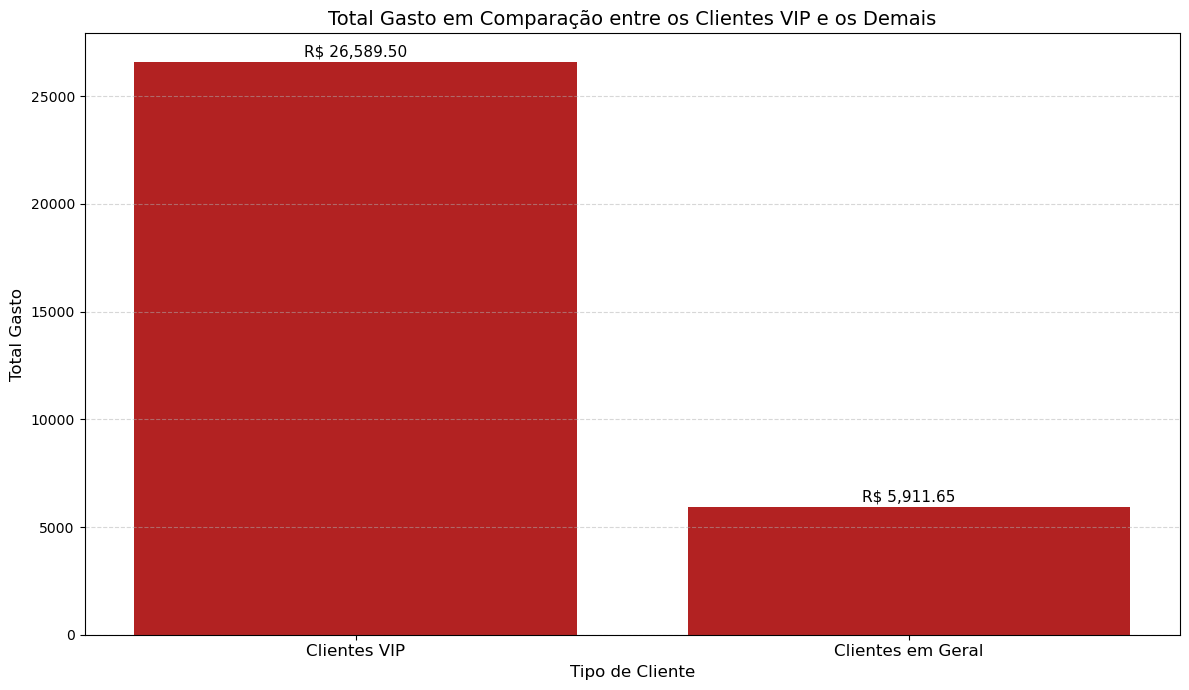

In [59]:
#Criando o gráfico para comparar os dois: Os 5 clientes que mais gastam e clientes comuns
categorias = ['Clientes VIP', 'Clientes em Geral']
valores = [clientesvipdf, clientescomunsdf]

plt.figure(figsize=(12, 7))
grafico1 = plt.bar(categorias, valores, color=['firebrick'])
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.title('Total Gasto em Comparação entre os Clientes VIP e os Demais', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize = 12) 
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar in grafico1:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + (max(valores) * 0.005), 
        f'R$ {yval:,.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=11, 
        color='black' 
    )

plt.show()

In [60]:
#Calculando a razão (quantas vezes os clientes VIP gastam mais) entre a média gasta por clientes comuns e os clientes VIP
razao = clientesvipdf/clientescomunsdf
razao

4.497813639170113

Conclusões: Podemos dizer, com certeza, que os nossos 5 clientes que mais gastam são valiosos para a empresa, sendo evidente pelo gráfico e pelo cálculo da razão entre a média de gastos entre clientes VIP e demais clientes, que estes gastam bem mais (4,5 vezes mais) do que todos os outros clientes, sendo assim viável a criação de um programa de fidelidade.